In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

In [ ]:
image_size = [224, 224]


In [ ]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


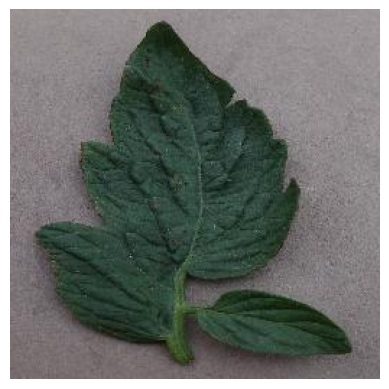

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/MyDrive/Tomato/Tomato_Bacterial_Spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
tomato_classes = []
individual_disease = []
image_paths = []
labels = []
d=0
for leaves in os.listdir('drive/MyDrive/Tomato/'):
    d=d+1
    for image in os.listdir('drive/MyDrive/Tomato/' + str(leaves)):
        individual_disease.append('drive/MyDrive/Tomato/' + str(leaves) + '/' + str(image))
        labels.append(leaves)
        path=('drive/MyDrive/Tomato/' + str(leaves) + '/' + str(image))
        img = cv2.imread(path)
        im =cv2.resize(img,(224,224))
        image_paths.append(im)
    tomato_classes.append(individual_disease)
    individual_disease = []
print("Labels:", labels)

Labels: ['Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus',

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
len(labels)

3506

In [ ]:
print(d)

10


In [ ]:
prediction = Dense(d, activation = 'softmax')(x)


In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)


In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
print(image_paths[0])

[[[122 114 125]
  [125 117 128]
  [121 113 124]
  ...
  [131 129 141]
  [130 128 140]
  [129 127 138]]

 [[114 106 117]
  [119 111 122]
  [112 104 115]
  ...
  [139 137 149]
  [139 137 149]
  [138 136 148]]

 [[113 105 116]
  [122 114 125]
  [116 108 119]
  ...
  [139 137 149]
  [140 138 150]
  [140 138 150]]

 ...

 [[173 166 173]
  [171 164 171]
  [169 162 169]
  ...
  [175 174 184]
  [175 174 184]
  [177 176 186]]

 [[171 164 171]
  [166 159 166]
  [167 160 167]
  ...
  [172 171 182]
  [172 171 180]
  [174 173 183]]

 [[171 164 171]
  [161 154 161]
  [164 157 164]
  ...
  [175 174 184]
  [174 173 183]
  [176 175 186]]]


In [ ]:
data_arr = np.array(image_paths)
label_arr = np.array(labels)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y= encoder.fit_transform(label_arr)
x= data_arr

In [ ]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=90)

In [ ]:
x_test.shape

(351, 224, 224, 3)

In [ ]:
mod = model.fit(
  x_train,y_train,
  validation_data=(x_test, y_test),
  verbose=1,
  epochs=10)


Epoch 1/10
99/99 [==============================] - 16s 161ms/step - loss: 0.8384 - accuracy: 0.9705 - val_loss: 3.3862 - val_accuracy: 0.9088
Epoch 2/10
99/99 [==============================] - 16s 165ms/step - loss: 0.5085 - accuracy: 0.9746 - val_loss: 1.0476 - val_accuracy: 0.9630
Epoch 3/10
99/99 [==============================] - 16s 163ms/step - loss: 0.1557 - accuracy: 0.9895 - val_loss: 0.6998 - val_accuracy: 0.9744
Epoch 4/10
99/99 [==============================] - 16s 161ms/step - loss: 0.1252 - accuracy: 0.9908 - val_loss: 0.3515 - val_accuracy: 0.9829
Epoch 5/10
99/99 [==============================] - 15s 150ms/step - loss: 0.1148 - accuracy: 0.9905 - val_loss: 0.5861 - val_accuracy: 0.9829
Epoch 6/10
99/99 [==============================] - 16s 162ms/step - loss: 0.0917 - accuracy: 0.9930 - val_loss: 0.5566 - val_accuracy: 0.9744
Epoch 7/10
99/99 [==============================] - 16s 162ms/step - loss: 0.1037 - accuracy: 0.9927 - val_loss: 0.4249 - val_accuracy: 0.9829

In [ ]:
model.save('my_model.keras')
'''mod1=model.evaluate(x_test,y_test)'''

'mod1=model.evaluate(x_test,y_test)'

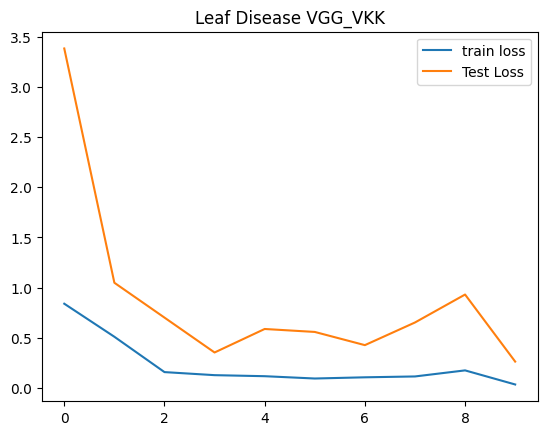

In [ ]:
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='Test Loss')
plt.title("Leaf Disease VGG_VKK")
plt.legend()
plt.show()

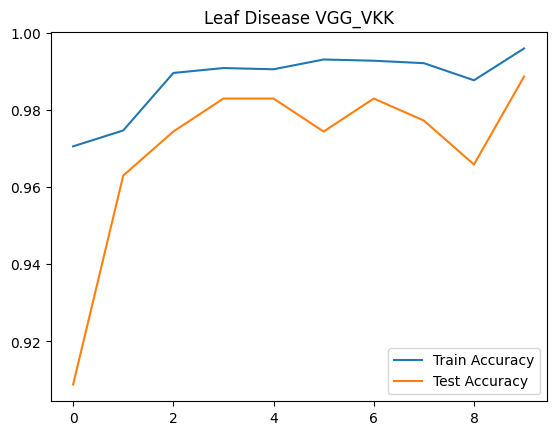

In [ ]:
plt.plot(mod.history['accuracy'], label='Train Accuracy')
plt.plot(mod.history['val_accuracy'], label='Test Accuracy')
plt.title("Leaf Disease VGG_VKK")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

11/11 [==============================] - 1s 136ms/step


In [ ]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.3425627e-36, 5.2631475e-21, 0.0000000e+00, ..., 1.9688619e-38,
        0.0000000e+00, 0.0000000e+00],
       [9.9140823e-16, 9.4609615e-21, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)


In [ ]:
y_pred

array([5, 9, 6, 2, 0, 6, 5, 6, 7, 5, 0, 8, 9, 7, 4, 0, 8, 9, 7, 8, 1, 6,
       5, 7, 7, 1, 5, 0, 1, 6, 8, 0, 1, 2, 6, 7, 0, 3, 5, 4, 3, 4, 6, 5,
       0, 0, 7, 6, 8, 0, 7, 5, 5, 8, 0, 6, 2, 3, 6, 5, 0, 6, 0, 6, 4, 1,
       8, 5, 1, 1, 1, 6, 3, 1, 8, 9, 1, 6, 0, 9, 5, 9, 7, 6, 6, 5, 4, 7,
       0, 1, 8, 1, 8, 4, 5, 5, 1, 0, 2, 7, 2, 0, 6, 6, 5, 4, 6, 2, 0, 4,
       8, 5, 5, 6, 4, 5, 7, 8, 1, 6, 0, 5, 8, 0, 2, 2, 0, 5, 8, 8, 8, 9,
       0, 5, 8, 2, 0, 7, 1, 5, 7, 0, 1, 7, 1, 8, 6, 8, 4, 1, 7, 3, 8, 0,
       0, 9, 1, 5, 2, 0, 6, 9, 4, 7, 4, 8, 6, 9, 3, 0, 1, 4, 3, 6, 6, 2,
       6, 1, 6, 7, 8, 4, 5, 2, 0, 0, 7, 8, 8, 7, 3, 5, 0, 1, 6, 2, 8, 0,
       1, 8, 6, 3, 8, 3, 1, 3, 5, 9, 6, 4, 6, 7, 8, 8, 6, 3, 8, 6, 6, 7,
       6, 2, 7, 5, 3, 1, 5, 1, 0, 3, 2, 7, 9, 1, 8, 8, 8, 5, 4, 6, 1, 6,
       8, 6, 9, 2, 3, 4, 2, 5, 1, 7, 2, 9, 8, 0, 5, 4, 9, 9, 9, 0, 8, 2,
       1, 2, 8, 7, 5, 7, 0, 4, 4, 5, 8, 1, 9, 5, 8, 0, 0, 0, 8, 7, 0, 4,
       5, 8, 7, 7, 9, 8, 8, 0, 4, 6, 0, 6, 0, 1, 6,

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, labels=np.unique(y_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.95      0.97      0.96        36
           2       0.96      1.00      0.98        25
           3       0.95      0.90      0.93        21
           4       1.00      0.97      0.98        31
           5       1.00      1.00      1.00        42
           6       1.00      0.98      0.99        51
           7       1.00      1.00      1.00        33
           8       0.98      1.00      0.99        46
           9       1.00      1.00      1.00        22

    accuracy                           0.98       351
   macro avg       0.98      0.98      0.98       351
weighted avg       0.98      0.98      0.98       351



In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
new_model = tf.keras.models.load_model('my_model.keras')

In [ ]:
new_model.summary()

In [ ]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)


11/11 - 2s - loss: 0.4277 - accuracy: 0.9829 - 2s/epoch - 167ms/step


In [ ]:
print(new_model.predict(x_test).shape)

11/11 [==============================] - 2s 140ms/step
(351, 10)


In [ ]:
def model_predict(img_path, model):
    img_path=input('Enter the testing image path: ')
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    print(preds)
    l=['tomato bacterial spot','tomato early blight','Tomato_Septoria_leaf_spot','Tomato_Target_Spot',
       'Tomato_healthy','Tomato_late_blight',
      'Tomato_leaf_mold','Tomato_mosaic_virus','Tomato_spider_mites_two_spotted','Tomato_yellowLeaf_Curl_Virus']
    print('Disease : ',l[int(preds)].upper())

In [ ]:
from keras.preprocessing import image

In [ ]:
preds = model_predict(img_path, model)
preds

Enter the testing image path: /content/drive/MyDrive/Tomato/Tomato_late_blight/a4534f9b-87ca-4ce0-a6f8-84f94544ef37___RS_LB 2775.JPG
/content/drive/MyDrive/Tomato/Tomato_late_blight/a4534f9b-87ca-4ce0-a6f8-84f94544ef37___RS_LB 2775.JPG
1/1 [==============================] - 0s 18ms/step
[5]
Disease :  TOMATO_LATE_BLIGHT
